# LAPTOP PRICE PREDICTION

## Data Loading and Understanding

In [2]:
import pandas as pd
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.shape

(1303, 12)

In [4]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
df.drop(['Unnamed: 0'],axis='columns',inplace=True)

In [7]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [8]:
df.duplicated().sum()

29

In [9]:
df.drop_duplicates(inplace=True)


In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

## Feature Engineering & EDA

In [12]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

In [13]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2,38378.6496
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8,33992.6400
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3,79866.7200
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5,12201.1200


In [14]:
df['Ram']=df['Ram'].astype(int)
df['Weight']=df['Weight'].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float64
 10  Price             1274 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 114.5+ KB


C:\Users\ARMS\AppData\Local\Temp\ipykernel_8116\3170946032.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


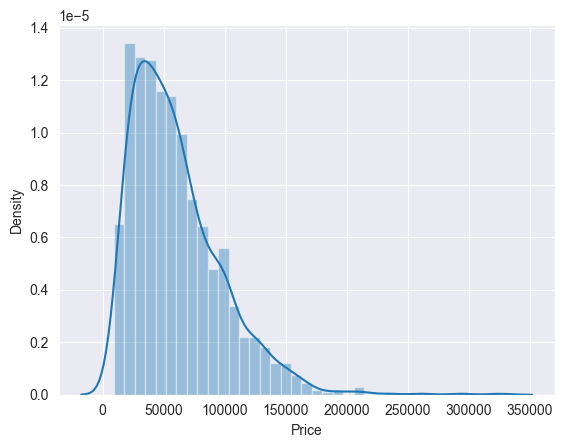

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='darkgrid')

sns.distplot(df['Price'])
plt.show()

<Axes: xlabel='Company'>

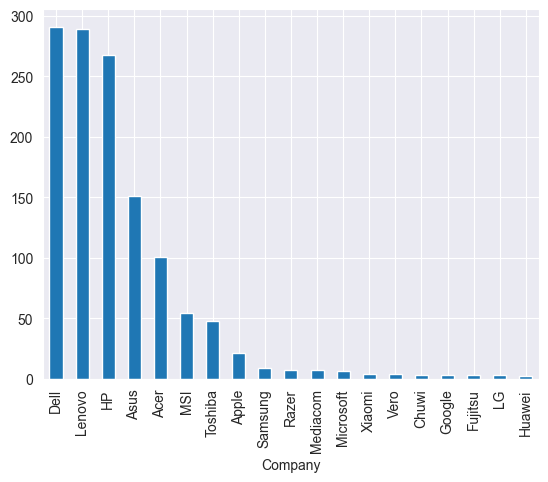

In [17]:
df['Company'].value_counts().plot(kind='bar')

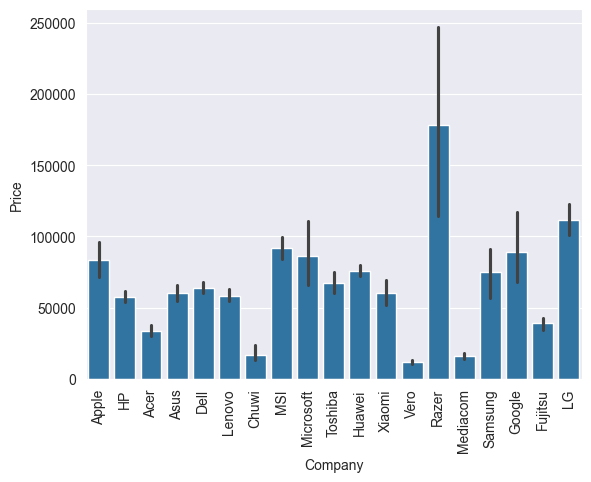

In [18]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

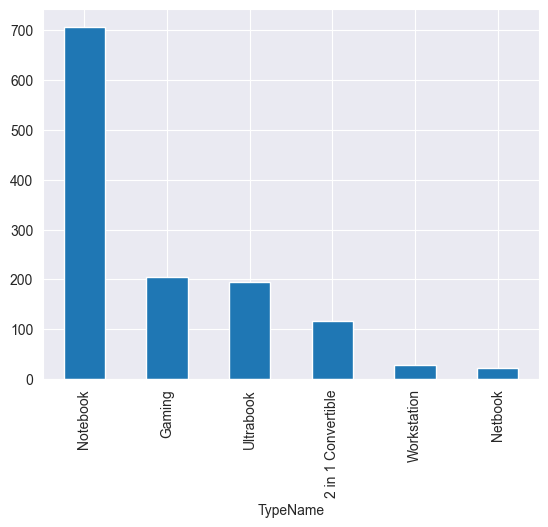

In [19]:
df['TypeName'].value_counts().plot(kind='bar')

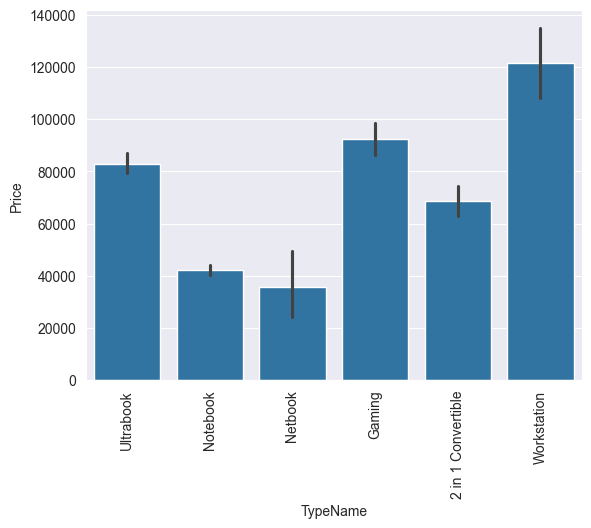

In [20]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Ram'>

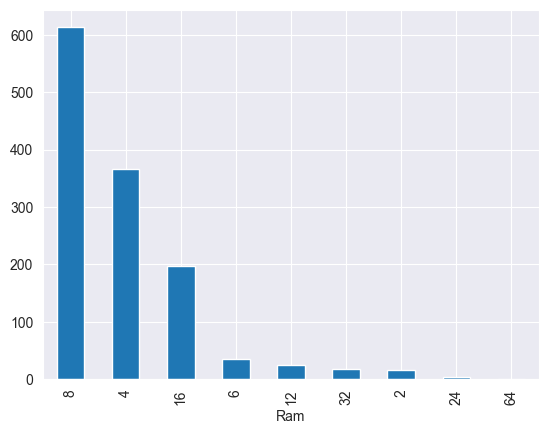

In [21]:
df['Ram'].value_counts().plot(kind='bar')

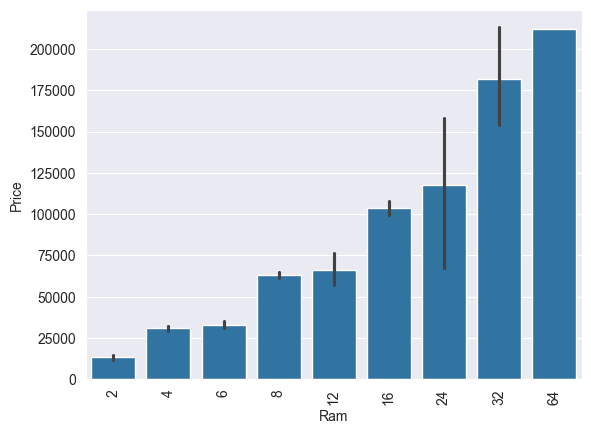

In [22]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [23]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832


<Axes: xlabel='Inches'>

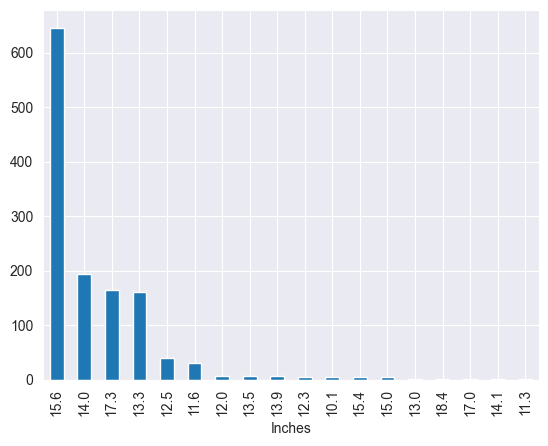

In [24]:
df['Inches'].value_counts().plot(kind='bar')

<Axes: xlabel='Inches', ylabel='Price'>

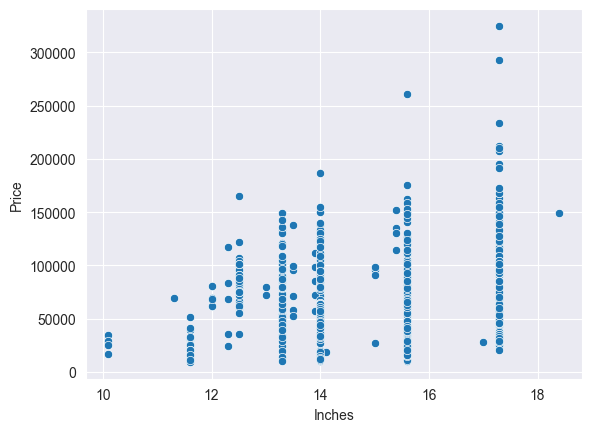

In [25]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

<Axes: xlabel='OpSys'>

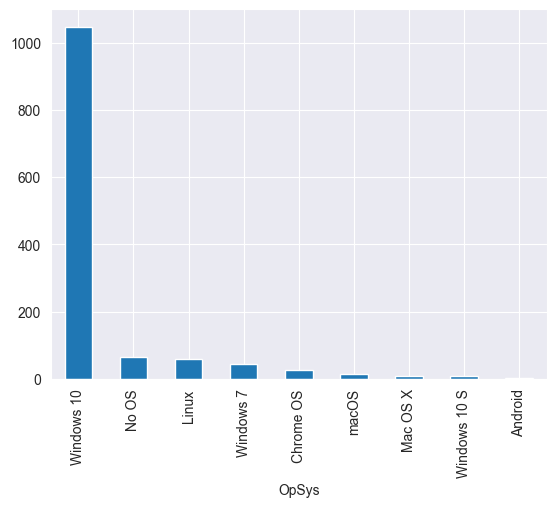

In [26]:
df['OpSys'].value_counts().plot(kind='bar')

In [27]:
def get_os(os):
    if os == 'Windows 10' or os == 'Windows 10 S' or os == 'Windows 7':
        return 'Windows'
    elif os=='macOS' or os=='Mac OS X':
        return 'Mac'
    else:
        return 'Linux/others'

In [28]:
df['os']=df['OpSys'].apply(get_os)

In [29]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,os
316,HP,2 in 1 Convertible,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,16,1TB SSD,Intel UHD Graphics 620,Windows 10,1.29,130482.7200,Windows
1067,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.62,42517.9728,Windows
987,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.50,63349.9200,Windows
1250,Dell,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,500GB HDD,Intel HD Graphics,Linux,2.20,17262.7200,Linux/others
576,Toshiba,Ultrabook,14.0,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.24,99367.2000,Windows


<Axes: xlabel='os'>

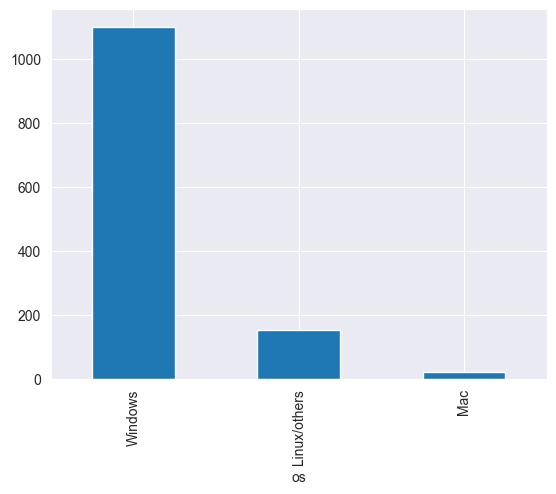

In [30]:
df['os'].value_counts().plot(kind='bar')

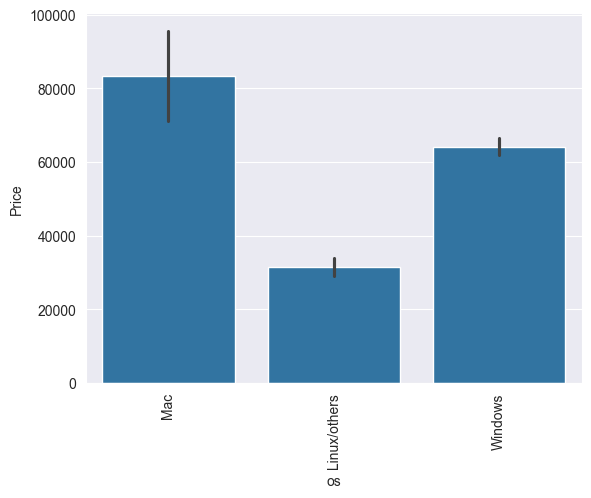

In [31]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [32]:
df.drop(['OpSys'],axis='columns',inplace=True)
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price,os
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,Mac
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,Mac
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,1.86,30636.0000,Linux/others


C:\Users\ARMS\AppData\Local\Temp\ipykernel_8116\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

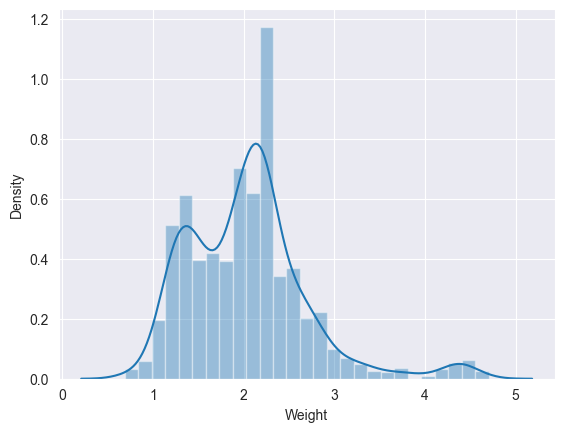

In [33]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

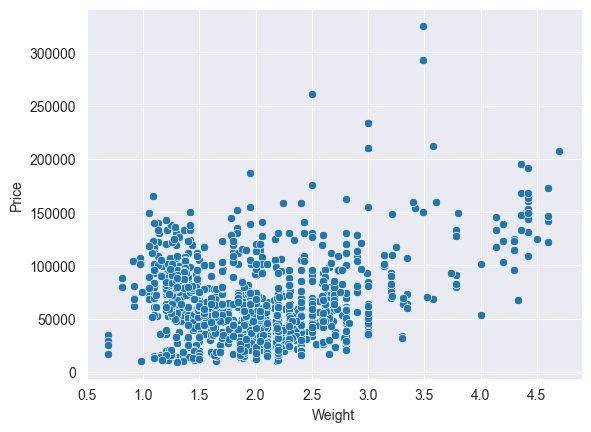

In [34]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [35]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price,os
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,Mac


In [36]:
df.shape

(1274, 11)

In [37]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscr

In [38]:
df['TouchScreen']=df['ScreenResolution'].apply(lambda x : 1 if 'Touchscreen' in x else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price,os,TouchScreen
649,Lenovo,Ultrabook,12.5,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,1.36,84395.5200,Windows,0
982,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6,256GB SSD,AMD Radeon 530,2.20,29250.7200,Windows,0
207,Dell,Ultrabook,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,1.21,103842.7200,Windows,1
1010,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,1.0TB Hybrid,Nvidia GeForce GTX 1050,2.65,50562.7200,Windows,0
1020,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i3 6100U 2.3GHz,4,1TB HDD,Intel HD Graphics 520,2.08,42410.3472,Windows,1


<Axes: xlabel='TouchScreen'>

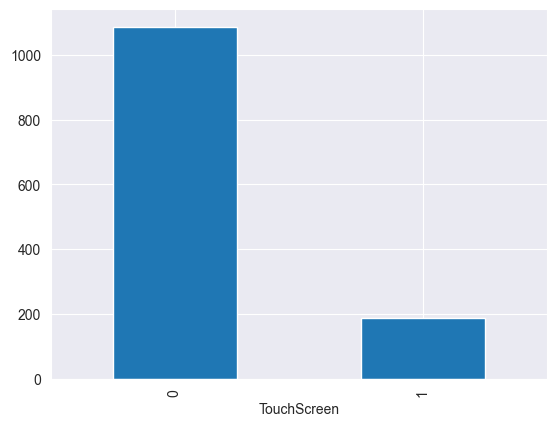

In [39]:
df['TouchScreen'].value_counts().plot(kind='bar')

<Axes: xlabel='TouchScreen', ylabel='Price'>

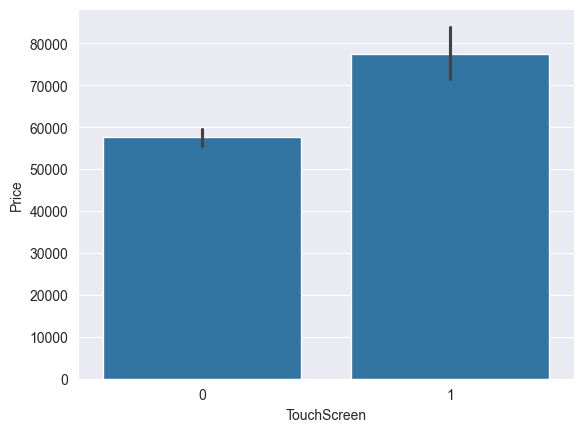

In [40]:
sns.barplot(x=df['TouchScreen'],y=df['Price'])

In [41]:
df['Ips']=df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price,os,TouchScreen,Ips
983,Fujitsu,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,256GB SSD,Intel HD Graphics 520,2.30,34578.7200,Windows,0,0
1109,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,2.59,71341.9200,Windows,0,1
356,Lenovo,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,2.20,17155.6272,Linux/others,0,0
794,Apple,Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.2GHz,8,512GB Flash Storage,Intel HD Graphics 5300,0.92,62071.2000,Mac,0,1
700,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 1050,2.56,43636.3200,Windows,0,0


<Axes: xlabel='Ips'>

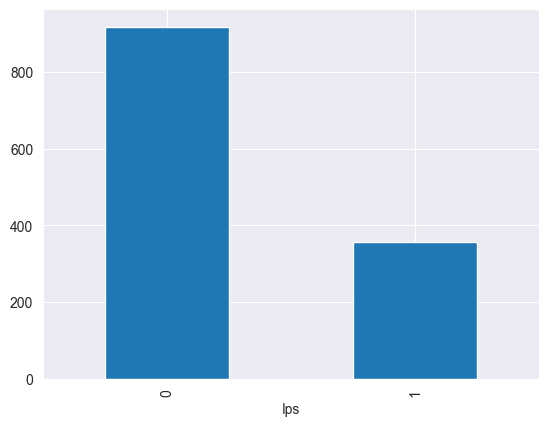

In [42]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

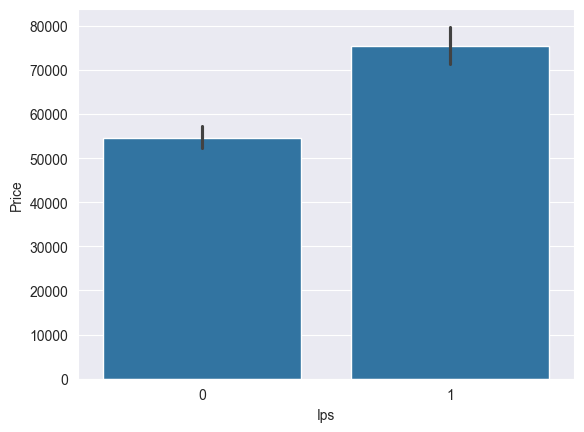

In [43]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [44]:
new = df['ScreenResolution'].str.split('x',expand=True)
df['x_res'] = new[0]
df['y_res'] = new[1]

In [45]:
df.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price,os,TouchScreen,Ips,x_res,y_res
1113,HP,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,512GB SSD,Intel HD Graphics 520,1.16,104908.32,Windows,0,0,Full HD 1920,1080
1175,Asus,Notebook,14.0,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4,256GB SSD,Intel HD Graphics 620,2.00,40972.32,Windows,0,0,Full HD 1920,1080
793,Lenovo,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,AMD Radeon R7 M460,2.08,51095.52,Windows,1,0,Full HD / Touchscreen 1920,1080


In [46]:

num = df['x_res'].str.extract(r'(\d+)')
df['x_res']=num[0]

In [47]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price,os,TouchScreen,Ips,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,Mac,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,Mac,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,1.86,30636.0000,Linux/others,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,1.83,135195.3360,Mac,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,1.37,96095.8080,Mac,0,1,2560,1600


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   Weight            1274 non-null   float64
 9   Price             1274 non-null   float64
 10  os                1274 non-null   object 
 11  TouchScreen       1274 non-null   int64  
 12  Ips               1274 non-null   int64  
 13  x_res             1274 non-null   object 
 14  y_res             1274 non-null   object 
dtypes: float64(3), int32(1), int64(2), object(9)
memory usage: 154.3+ KB


In [49]:
df['x_res']=df['x_res'].astype(int)
df['y_res']=df['y_res'].astype(int)

In [50]:
df.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price,os,TouchScreen,Ips,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,Mac,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,Mac,0,0,1440,900


In [51]:
df['ppi'] = round(((df['x_res']**2) + (df['y_res']**2))**0.5/df['Inches'].astype(float),2)
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price,os,TouchScreen,Ips,x_res,y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,Mac,0,1,2560,1600,226.98
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,Mac,0,0,1440,900,127.68
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,1.86,30636.0000,Linux/others,0,0,1920,1080,141.21


In [52]:
df.drop(columns=['Inches','ScreenResolution','x_res','y_res'],inplace=True)

In [53]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,Weight,Price,os,TouchScreen,Ips,ppi
709,HP,Notebook,AMD A10-Series 9620P 2.5GHz,6,2TB HDD,AMD Radeon 530,2.71,34898.9328,Windows,0,1,127.34
347,Dell,Ultrabook,Intel Core i7 8650U 1.9GHz,16,512GB SSD + 256GB SSD,Intel UHD Graphics 620,1.88,85672.1088,Windows,0,0,141.21
588,Lenovo,Notebook,Intel Core i7 8550U 1.8GHz,12,1TB HDD,Intel HD Graphics 620,2.20,32447.5200,Windows,1,0,100.45
444,HP,Gaming,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,2.20,58554.7200,Windows,0,1,141.21
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,1.86,30636.0000,Linux/others,0,0,141.21


In [54]:
df['Cpu_Name']=df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))
df.sample(3)

,Company,TypeName,Cpu,Ram,Memory,Gpu,Weight,Price,os,TouchScreen,Ips,ppi,Cpu_Name
419,Lenovo,Ultrabook,Intel Core i7 8550U 1.8GHz,8,256GB SSD,AMD Radeon RX 550,1.75,64755.4464,Windows,0,1,157.35,Intel Core i7
538,HP,Gaming,Intel Core i7 7700HQ 2.8GHz,12,1TB HDD,Nvidia GeForce GTX 1060,2.62,95850.7200,Windows,0,0,127.34,Intel Core i7
1235,HP,Notebook,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,2.10,25467.8400,Windows,0,0,141.21,Intel Core i3


In [55]:
df['Cpu_Name'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD A9-Series 9420',
       'Intel Core i3', 'Intel Core M', 'Intel Atom x5-Z8350',
       'AMD E-Series E2-9000e', 'Intel Atom x5-Z8300',
       'AMD E-Series E2-6110', 'AMD A6-Series 9220', 'Intel Celeron Dual',
       'AMD Ryzen 1700', 'Intel Pentium Quad', 'Intel Atom x5-Z8550',
       'AMD FX 9830P', 'AMD E-Series 6110', 'Intel Xeon E3-1505M',
       'AMD E-Series 9000e', 'AMD A10-Series A10-9620P',
       'AMD A6-Series A6-9220', 'AMD A10-Series 9600P',
       'AMD A8-Series 7410', 'AMD A12-Series 9720P', 'Intel Celeron Quad',
       'AMD Ryzen 1600', 'AMD A10-Series 9620P', 'AMD E-Series 7110',
       'AMD A9-Series A9-9420', 'Intel Xeon E3-1535M',
       'AMD E-Series E2-9000', 'AMD A6-Series 7310', 'Intel Atom Z8350',
       'Intel Pentium Dual', 'AMD A12-Series 9700P', 'AMD A4-Series 7210',
       'AMD FX 8800P', 'Intel Atom X5-Z8350', 'Samsung Cortex A72&A53',
       'AMD E-Series 9000', 'AMD A9-Series 9410'], dtype=object)

In [56]:
def get_brand(text):
    if text=='Intel Core i5' or text=='Intel Core i3' or text=='Intel Core i7':
        return text
    else:
        if text.split()[0]=='Intel':
            return "Other Intel Processor"
        else:
            return "AMD Processor"

In [57]:
df['Cpu Brand']=df['Cpu_Name'].apply(get_brand)
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,Weight,Price,os,TouchScreen,Ips,ppi,Cpu_Name,Cpu Brand
762,Google,Ultrabook,Intel Core i5 7Y57 1.2GHz,8,256GB SSD,Intel HD Graphics 615,1.10,83063.52,Linux/others,1,0,234.51,Intel Core i5,Intel Core i5
246,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,2.04,29783.52,Windows,1,0,100.45,Intel Core i5,Intel Core i5
647,Razer,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD,Nvidia GeForce GTX 1060,1.95,138474.72,Windows,0,0,157.35,Intel Core i7,Intel Core i7
1247,Asus,Gaming,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,2.34,123876.00,Windows,0,1,141.21,Intel Core i7,Intel Core i7
44,Dell,2 in 1 Convertible,Intel Core i5 8250U 1.6GHz,12,1TB HDD,Nvidia GeForce 150MX,2.77,53226.72,Windows,1,0,127.34,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu Brand'>

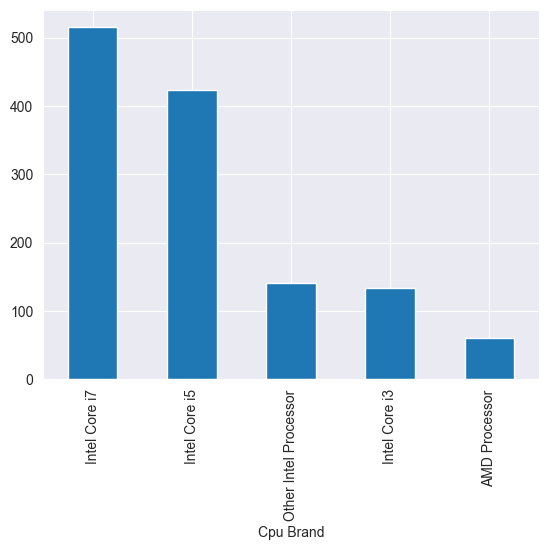

In [58]:
df['Cpu Brand'].value_counts().plot(kind='bar')

<Axes: xlabel='Cpu Brand', ylabel='Price'>

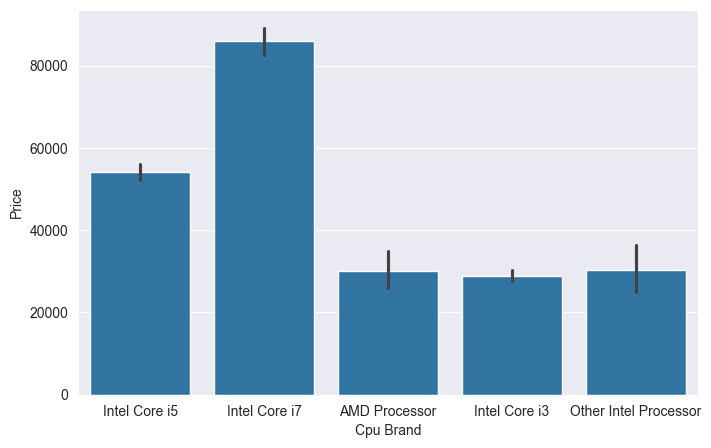

In [59]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['Cpu Brand'],y=df['Price'])

In [60]:
df.drop(columns=['Cpu','Cpu_Name'],inplace=True)
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,Weight,Price,os,TouchScreen,Ips,ppi,Cpu Brand
1198,Acer,Notebook,4,1TB HDD,Intel HD Graphics 500,2.10,14492.16,Linux/others,0,0,100.45,Other Intel Processor
1054,Dell,Ultrabook,16,1TB SSD,Intel HD Graphics 620,1.20,120093.12,Windows,1,0,276.05,Intel Core i7
506,Asus,Notebook,8,256GB SSD + 1TB HDD,Intel HD Graphics 620,2.00,65214.72,Windows,0,0,141.21,Intel Core i7
711,Dell,Notebook,8,256GB SSD,Nvidia GeForce 930MX,1.64,58021.92,Linux/others,0,0,157.35,Intel Core i5
1112,Lenovo,Notebook,4,128GB SSD,Intel HD Graphics 520,2.10,22857.12,Windows,0,0,100.45,Intel Core i3


In [61]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [62]:
df['Gpu Brand']=df['Gpu'].apply(lambda x: x.split()[0])
df

,Company,TypeName,Ram,Memory,Gpu,Weight,Price,os,TouchScreen,Ips,ppi,Cpu Brand,Gpu Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,1.37,71378.6832,Mac,0,1,226.98,Intel Core i5,Intel
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,1.34,47895.5232,Mac,0,0,127.68,Intel Core i5,Intel
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,1.86,30636.0000,Linux/others,0,0,141.21,Intel Core i5,Intel
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,1.83,135195.3360,Mac,0,1,220.53,Intel Core i7,AMD
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,1.37,96095.8080,Mac,0,1,226.98,Intel Core i5,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,500GB HDD,Nvidia GeForce 920M,2.20,38378.6496,Windows,0,0,100.45,Intel Core i7,Nvidia
1270,Lenovo,2 in 1 Convertible,4,128GB SSD,Intel HD Graphics 520,1.80,33992.6400,Windows,1,1,157.35,Intel Core i7,Intel
1271,Lenovo,2 in 1 Convertible,16,512GB SSD,Intel HD Graphics 520,1.30,79866.7200,Windows,1,1,276.05,Intel Core i7,Intel
1272,Lenovo,Notebook,2,64GB Flash Storage,Intel HD Graphics,1.50,12201.1200,Windows,0,0,111.94,Other Intel Processor,Intel


In [63]:
df.drop(columns=['Gpu'],inplace=True)

In [64]:
df.sample(5)

,Company,TypeName,Ram,Memory,Weight,Price,os,TouchScreen,Ips,ppi,Cpu Brand,Gpu Brand
281,Dell,Notebook,4,1TB HDD,2.25,22803.8400,Linux/others,0,0,141.21,Intel Core i3,AMD
979,Asus,Gaming,16,256GB SSD + 1TB HDD,2.99,93186.7200,Windows,0,0,127.34,Intel Core i7,Nvidia
448,MSI,Gaming,8,256GB SSD,2.20,54757.9872,Windows,0,0,141.21,Intel Core i5,Nvidia
765,Acer,Notebook,4,128GB SSD,1.60,34898.4000,Windows,0,0,117.83,Intel Core i5,Intel
191,Vero,Notebook,4,32GB Flash Storage,1.30,13852.8000,Windows,0,1,157.35,Other Intel Processor,Intel


<Axes: xlabel='Gpu Brand'>

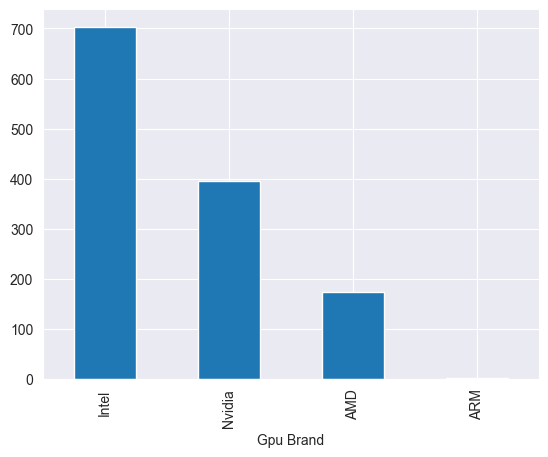

In [65]:
df['Gpu Brand'].value_counts().plot(kind='bar')

In [66]:
df = df[df['Gpu Brand']!='ARM']
df

,Company,TypeName,Ram,Memory,Weight,Price,os,TouchScreen,Ips,ppi,Cpu Brand,Gpu Brand
0,Apple,Ultrabook,8,128GB SSD,1.37,71378.6832,Mac,0,1,226.98,Intel Core i5,Intel
1,Apple,Ultrabook,8,128GB Flash Storage,1.34,47895.5232,Mac,0,0,127.68,Intel Core i5,Intel
2,HP,Notebook,8,256GB SSD,1.86,30636.0000,Linux/others,0,0,141.21,Intel Core i5,Intel
3,Apple,Ultrabook,16,512GB SSD,1.83,135195.3360,Mac,0,1,220.53,Intel Core i7,AMD
4,Apple,Ultrabook,8,256GB SSD,1.37,96095.8080,Mac,0,1,226.98,Intel Core i5,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,500GB HDD,2.20,38378.6496,Windows,0,0,100.45,Intel Core i7,Nvidia
1270,Lenovo,2 in 1 Convertible,4,128GB SSD,1.80,33992.6400,Windows,1,1,157.35,Intel Core i7,Intel
1271,Lenovo,2 in 1 Convertible,16,512GB SSD,1.30,79866.7200,Windows,1,1,276.05,Intel Core i7,Intel
1272,Lenovo,Notebook,2,64GB Flash Storage,1.50,12201.1200,Windows,0,0,111.94,Other Intel Processor,Intel


<Axes: xlabel='Gpu Brand'>

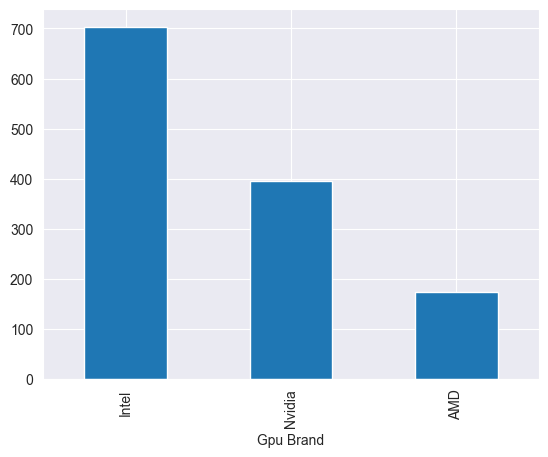

In [67]:
df['Gpu Brand'].value_counts().plot(kind='bar')

<Axes: xlabel='Gpu Brand', ylabel='Price'>

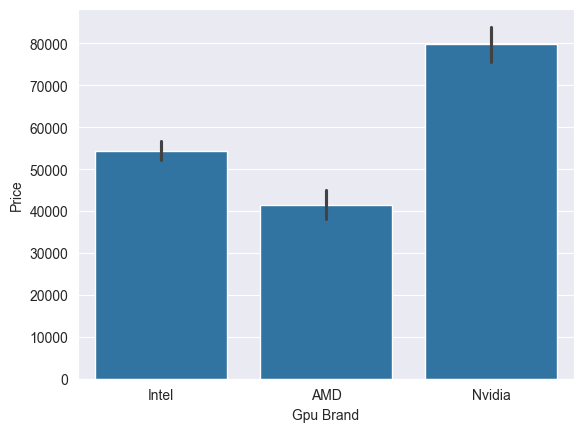

In [68]:
sns.barplot(x=df['Gpu Brand'],y=df['Price'])

In [69]:
df.sample(5)

,Company,TypeName,Ram,Memory,Weight,Price,os,TouchScreen,Ips,ppi,Cpu Brand,Gpu Brand
1177,Lenovo,Gaming,16,512GB SSD,3.31,69530.4000,Windows,0,1,141.21,Intel Core i7,Nvidia
400,Lenovo,Notebook,4,1TB HDD,2.20,16303.6800,Windows,0,0,100.45,Other Intel Processor,Intel
659,Dell,Gaming,32,512GB SSD + 1TB HDD,4.42,167691.8736,Windows,0,1,124.86,Intel Core i7,Nvidia
1135,Lenovo,Notebook,16,1.0TB Hybrid,2.50,58554.7200,Windows,0,0,141.21,Intel Core i7,AMD
390,Asus,Gaming,8,1TB HDD,3.00,55357.9200,Windows,0,0,127.34,Intel Core i7,Nvidia


In [70]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                35
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [71]:
def extract_values(x):
    ssd,hdd,flash,hybrid=0,0,0,0
    for value in x.split('+'):
        value = value.strip()
        if 'SSD'  in value:
            ssd +=int(value.replace('GB','').replace('SSD','').replace('TB','000'))
        elif 'HDD'  in value:
            hdd +=int(float((value.replace('GB','').replace('TB','000').replace('HDD','').replace('\.0','')).strip()))    
        elif 'Flash Storage'  in value:
            flash +=int(value.replace('GB','').replace('Flash Storage',''))
        elif 'Hybrid'  in value:
            hybrid +=int(float((value.replace('TB','000').replace('GB','').replace('Hybrid','').replace('\.0','')).strip()))
        
        return pd.Series({'SSD':ssd,'HDD':hdd,'Flash Storage':flash,'Hybrid':hybrid})

<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:12: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:12: SyntaxWarning: invalid escape sequence '\.'
C:\Users\ARMS\AppData\Local\Temp\ipykernel_8116\2946613536.py:8: SyntaxWarning: invalid escape sequence '\.'
  hdd +=int(float((value.replace('GB','').replace('TB','000').replace('HDD','').replace('\.0','')).strip()))
C:\Users\ARMS\AppData\Local\Temp\ipykernel_8116\2946613536.py:12: SyntaxWarning: invalid escape sequence '\.'
  hybrid +=int(float((value.replace('TB','000').replace('GB','').replace('Hybrid','').replace('\.0','')).strip()))


In [72]:
df[['SSD','HDD','Flash Storage','Hybrid']]=df['Memory'].apply(extract_values)
df.sample(5)

C:\Users\ARMS\AppData\Local\Temp\ipykernel_8116\704719945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['SSD','HDD','Flash Storage','Hybrid']]=df['Memory'].apply(extract_values)
C:\Users\ARMS\AppData\Local\Temp\ipykernel_8116\704719945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['SSD','HDD','Flash Storage','Hybrid']]=df['Memory'].apply(extract_values)
C:\Users\ARMS\AppData\Local\Temp\ipykernel_8116\704719945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,Company,TypeName,Ram,Memory,Weight,Price,os,TouchScreen,Ips,ppi,Cpu Brand,Gpu Brand,SSD,HDD,Flash Storage,Hybrid
1047,MSI,Gaming,16,256GB SSD + 1TB HDD,3.78,82351.6992,Windows,0,1,127.34,Intel Core i7,Nvidia,256,0,0,0
1195,HP,Notebook,12,128GB SSD + 1TB HDD,2.21,70702.5600,Windows,0,1,141.21,Intel Core i7,Nvidia,128,0,0,0
1240,Lenovo,Notebook,6,256GB SSD,2.20,31838.5296,Windows,0,0,141.21,AMD Processor,AMD,256,0,0,0
16,Dell,Notebook,8,256GB SSD,2.20,39693.6000,Windows,0,0,141.21,Intel Core i7,AMD,256,0,0,0
730,Acer,Gaming,16,128GB SSD + 1TB HDD,4.20,103096.8000,Windows,0,1,127.34,Intel Core i7,Nvidia,128,0,0,0


In [73]:
df.drop(columns=['Memory'],inplace=True)

C:\Users\ARMS\AppData\Local\Temp\ipykernel_8116\223790573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Memory'],inplace=True)


In [74]:
df.head()

,Company,TypeName,Ram,Weight,Price,os,TouchScreen,Ips,ppi,Cpu Brand,Gpu Brand,SSD,HDD,Flash Storage,Hybrid
0,Apple,Ultrabook,8,1.37,71378.6832,Mac,0,1,226.98,Intel Core i5,Intel,128,0,0,0
1,Apple,Ultrabook,8,1.34,47895.5232,Mac,0,0,127.68,Intel Core i5,Intel,0,0,128,0
2,HP,Notebook,8,1.86,30636.0000,Linux/others,0,0,141.21,Intel Core i5,Intel,256,0,0,0
3,Apple,Ultrabook,16,1.83,135195.3360,Mac,0,1,220.53,Intel Core i7,AMD,512,0,0,0
4,Apple,Ultrabook,8,1.37,96095.8080,Mac,0,1,226.98,Intel Core i5,Intel,256,0,0,0


In [75]:
import numpy as np

In [76]:
df.corr(numeric_only=True)['Price']

Ram              0.739996
Weight           0.211667
Price            1.000000
TouchScreen      0.190382
Ips              0.251514
ppi              0.345142
SSD              0.675413
HDD             -0.381480
Flash Storage   -0.036712
Hybrid          -0.005514
Name: Price, dtype: float64

In [77]:
df.drop(columns=['Flash Storage','Hybrid'],inplace=True)

C:\Users\ARMS\AppData\Local\Temp\ipykernel_8116\1513214296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Flash Storage','Hybrid'],inplace=True)


In [78]:
df.head()

,Company,TypeName,Ram,Weight,Price,os,TouchScreen,Ips,ppi,Cpu Brand,Gpu Brand,SSD,HDD
0,Apple,Ultrabook,8,1.37,71378.6832,Mac,0,1,226.98,Intel Core i5,Intel,128,0
1,Apple,Ultrabook,8,1.34,47895.5232,Mac,0,0,127.68,Intel Core i5,Intel,0,0
2,HP,Notebook,8,1.86,30636.0000,Linux/others,0,0,141.21,Intel Core i5,Intel,256,0
3,Apple,Ultrabook,16,1.83,135195.3360,Mac,0,1,220.53,Intel Core i7,AMD,512,0
4,Apple,Ultrabook,8,1.37,96095.8080,Mac,0,1,226.98,Intel Core i5,Intel,256,0


<Axes: >

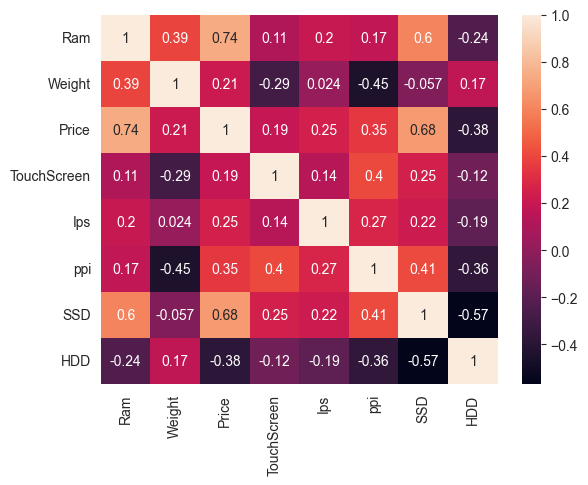

In [79]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## Model Training

In [80]:
x=df.drop(columns=['Price'])
y=np.log(df['Price'])

In [81]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1269    10.555257
1270    10.433899
1271    11.288115
1272     9.409283
1273    10.614129
Name: Price, Length: 1273, dtype: float64

In [82]:
x

,Company,TypeName,Ram,Weight,os,TouchScreen,Ips,ppi,Cpu Brand,Gpu Brand,SSD,HDD
0,Apple,Ultrabook,8,1.37,Mac,0,1,226.98,Intel Core i5,Intel,128,0
1,Apple,Ultrabook,8,1.34,Mac,0,0,127.68,Intel Core i5,Intel,0,0
2,HP,Notebook,8,1.86,Linux/others,0,0,141.21,Intel Core i5,Intel,256,0
3,Apple,Ultrabook,16,1.83,Mac,0,1,220.53,Intel Core i7,AMD,512,0
4,Apple,Ultrabook,8,1.37,Mac,0,1,226.98,Intel Core i5,Intel,256,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,2.20,Windows,0,0,100.45,Intel Core i7,Nvidia,0,500
1270,Lenovo,2 in 1 Convertible,4,1.80,Windows,1,1,157.35,Intel Core i7,Intel,128,0
1271,Lenovo,2 in 1 Convertible,16,1.30,Windows,1,1,276.05,Intel Core i7,Intel,512,0
1272,Lenovo,Notebook,2,1.50,Windows,0,0,111.94,Other Intel Processor,Intel,0,0


In [83]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

In [84]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.15,random_state=0)

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso


In [86]:
df.head(1)

,Company,TypeName,Ram,Weight,Price,os,TouchScreen,Ips,ppi,Cpu Brand,Gpu Brand,SSD,HDD
0,Apple,Ultrabook,8,1.37,71378.6832,Mac,0,1,226.98,Intel Core i5,Intel,128,0


In [87]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first',handle_unknown='infrequent_if_exist'),[0,1,4,8,9])
],remainder='passthrough')


## Linear Regression

In [88]:

step2=LinearRegression()
pipe1 = Pipeline([
('step1',step1),
('step2',step2)
])

pipe1.fit(X_train,y_train)
pipe1.score(X_test,y_test)



0.7958100204233253

## SVM

In [100]:
step2 = SVR()

pipe1 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe1.fit(X_train,y_train)
pipe1.score(X_test,y_test)

0.5156827385895939

## Random Forest Regressor

In [89]:

step2=RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
pipe1 = Pipeline([
('step1',step1),
('step2',step2)
])

pipe1.fit(X_train,y_train)
pipe1.score(X_test,y_test)

0.8686181337735237

## XGB Regressor

In [107]:
step2 = XGBRegressor(n_estimators=45)
pipe1 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe1.fit(X_train,y_train)
pipe1.score(X_test,y_test)

0.8835012269174494

## Desicion Tree Regressor

In [91]:
step2 = DecisionTreeRegressor(max_depth=8)

pipe1 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe1.fit(X_train,y_train)
pipe1.score(X_test,y_test)

0.8441302983541594

## Lasso Regressor

In [99]:

step2 = Lasso(alpha=0.0001)

pipe1 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe1.fit(X_train,y_train)
pipe1.score(X_test,y_test)


0.7956790424744201

In [108]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe1,open('model.pkl','wb'))